## KNN: Predicting car prices

In this project we will work with a dataset of cars properties and their prices. The dataset is available at [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/automobile).

Created by SaidakbarP 11/16/2019

### Data preparation

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
cols_str ="symboling	normalized_losses	make	fuel_type	aspiration	num_doors	body_style	drive_wheels	engine_location	wheel_base	length	width	height	curb_weight	engine_type	num_cylinders	engine_size	fuel_system	bore	stroke	compression_ratio	horsepower	peak_rpm	city_mpg	highway_mpg	price".split('\t')
cars = pd.read_csv("imports-85.data", header=None, names = cols_str, na_values=['?'], index_col=False)

Since the dataset does not include the header/column names, we included them during the loading of the file. Additionally, missing values are indicated with '?', we also changed them to NaN.

In [70]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [71]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [72]:
cars.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


There are 16 numeric features that we can feed into our KNN model. But, not all of them are relevant and we will have to perform feature selection with hyperparameter optimization and grid search.  

In [73]:
len(cars.describe().columns)

16

We will keep in mind that we can convert some of the categorical variables into numeric.

Binary: num-of-doors, fuel-type, engine-location, aspiration.

7 categories: num-of-cylinders

In [74]:
pd.DataFrame(cars.isnull().sum(), columns=['missing']).sort_values('missing', ascending=False)[:5]

,missing
normalized_losses,41
price,4
stroke,4
bore,4
peak_rpm,2


normalized_losses column has most of the missing values.

In [75]:
cars['normalized_losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

We will replace the missing values with the median of the column.

In [76]:
cars['normalized_losses'].fillna(cars['normalized_losses'].median(), inplace=True)

In [77]:
pd.DataFrame(cars.isnull().sum(), columns=['missing']).sort_values('missing', ascending=False)[:5]

,missing
price,4
stroke,4
bore,4
peak_rpm,2
num_doors,2


Now we can drop those few missing rows

In [78]:
cars.dropna(axis=0, inplace=True)

KNN model works better if we normalize the dataset into [0, 1] range. We can also use standard deviations. Both ways we make sure that the distance is comparable between features.

In [79]:
numeric_cols = list(cars.describe().columns)
knn_data = cars[numeric_cols].copy()
features = knn_data.drop('price', axis=1).columns
knn_data[features] = (knn_data[features] - knn_data[features].min())/(knn_data[features].max()-knn_data[features].min())

In [80]:
knn_data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.559585,0.288229,0.359295,0.495917,0.478101,0.505829,0.416411,0.253299,0.564730,0.561362,0.196477,0.259261,0.387649,0.342401,0.389146,13285.025907
std,0.247116,0.169768,0.179371,0.186248,0.182718,0.199564,0.204306,0.156945,0.194560,0.150200,0.248593,0.177384,0.191304,0.177440,0.179392,8089.082886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.157068,0.230321,0.376119,0.324786,0.350000,0.254849,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.166667,0.236842,7738.000000
50%,0.600000,0.261780,0.303207,0.479104,0.435897,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,10245.000000
75%,0.800000,0.361257,0.460641,0.649254,0.564103,0.658333,0.567882,0.320755,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16515.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


### Model building

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(tr_col, target_col, df):
    np.random.seed(1) # random seed for reproducibility
    df = df.reindex(np.random.permutation(df.index)) # shuffle df
    test_thresh = round(df.shape[0]*0.5) # get 1/2 for test
    train_df = df[test_thresh:]
    test_df = df[:test_thresh]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[tr_col]], train_df[target_col]) # train the model
    preds = knn.predict(test_df[[tr_col]])
    rmse = np.sqrt(mean_squared_error(test_df[target_col], preds))
    return rmse    

In [82]:
rmses = {}
for col in knn_data[features]:
    rmses[col]=knn_train_test(col, 'price', knn_data)
rmses = pd.Series(rmses)
rmses.sort_values()

engine_size          3637.032072
horsepower           3772.730261
city_mpg             4120.369556
curb_weight          4179.279137
width                4578.142212
highway_mpg          4813.877383
length               5001.048944
wheel_base           5888.480216
bore                 6290.689988
normalized_losses    7161.625085
compression_ratio    7247.328462
stroke               7355.378172
peak_rpm             7572.534788
height               7677.314465
symboling            7742.010876
dtype: float64

Based on the univariate KNN model engine size, horsepower and city mpg play essential role in obtaining a better model.

Now let's create a function that can accept different k values.

In [83]:
def knn_train_test_k(tr_col, target_col, df, k=5):
    np.random.seed(1) # random seed for reproducibility
    df = df.reindex(np.random.permutation(df.index)) # shuffle df
    test_thresh = round(df.shape[0]*0.5) # get 1/2 for test
    train_df = df[test_thresh:]
    test_df = df[:test_thresh]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[tr_col]], train_df[target_col]) # train the model
    preds = knn.predict(test_df[[tr_col]])
    rmse = np.sqrt(mean_squared_error(test_df[target_col], preds))
    return rmse  

In [84]:
total = {}
k_vals = [1,3,5,7,9]
for col in knn_data[features]:
    rmses = {}
    for k in k_vals:
        rmses[k]=knn_train_test_k(col, 'price', knn_data, k)
    total[col] = rmses

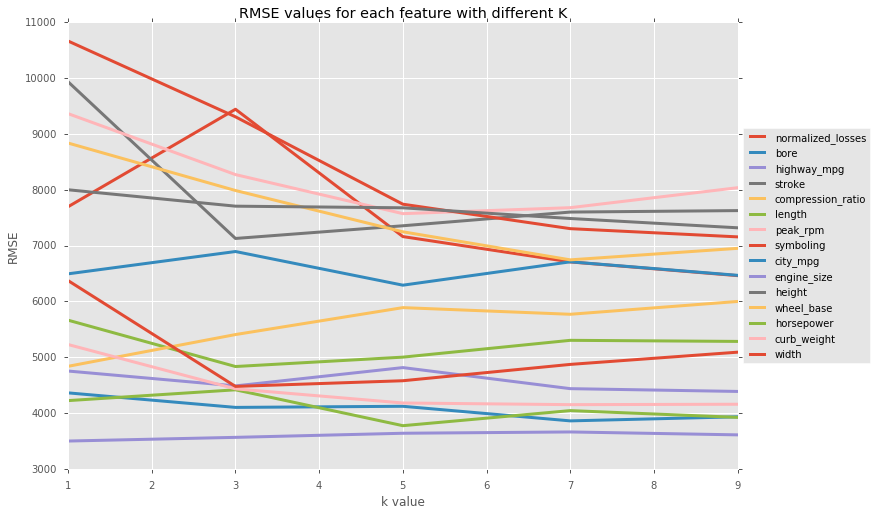

In [97]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
for k,v in total.items():
    x = []
    y = []
    for i in [1,3,5,7,9]:
        x.append(i)
        y.append(v[i])  
    plt.plot(x,y, label=k, lw=3)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.title("RMSE values for each feature with different K")
plt.show()

In [96]:
k_res = pd.DataFrame(total)
print('average RMSE for different features:\n', k_res.apply(np.mean,axis=0).sort_values())
print("\naverage RMSE for different Ks:\n", k_res.apply(np.mean,axis=1).sort_values())

average RMSE for different features:
 engine_size          3593.321367
city_mpg             4074.501656
horsepower           4074.994186
curb_weight          4429.174543
highway_mpg          4574.847857
width                5077.748463
length               5216.578557
wheel_base           5579.805702
bore                 6571.010673
normalized_losses    7494.115770
compression_ratio    7553.627951
height               7637.863655
stroke               7929.504634
peak_rpm             8185.439997
symboling            8435.218456
dtype: float64

average RMSE for different Ks:
 7    5754.788716
9    5759.816328
5    5802.522774
3    6163.567687
1    6661.888984
dtype: float64


K value of 7 and engine_size, city_mpg and horsepower give us the smallest RMSE. 

### Multivariate KNN model

In [98]:
def knn_train_test_k(tr_col, target_col, df, k=5):
    np.random.seed(1) # random seed for reproducibility
    df = df.reindex(np.random.permutation(df.index)) # shuffle df
    test_thresh = round(df.shape[0]*0.5) # get 1/2 for test
    train_df = df[test_thresh:]
    test_df = df[:test_thresh]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[tr_col], train_df[target_col]) # train the model
    preds = knn.predict(test_df[tr_col])
    rmse = np.sqrt(mean_squared_error(test_df[target_col], preds))
    return rmse  

In [100]:
cols = ['engine_size','horsepower', 'city_mpg', 'curb_weight', 'width', 'highway_mpg']
for i in range(2,len(cols)+1):
    ncols = cols[:i]
    print(ncols, knn_train_test_k(ncols,'price', knn_data))

['engine_size', 'horsepower'] 3071.8546534761917
['engine_size', 'horsepower', 'city_mpg'] 3326.462331629504
['engine_size', 'horsepower', 'city_mpg', 'curb_weight'] 3266.445687211101
['engine_size', 'horsepower', 'city_mpg', 'curb_weight', 'width'] 3668.1472830299494
['engine_size', 'horsepower', 'city_mpg', 'curb_weight', 'width', 'highway_mpg'] 3662.4493123910033


First two columns are resulting in the lowest RMSE.

Since we now know which features are important, we will now consider different K values for our top 3 models.

In [135]:
cols = ['engine_size', 'horsepower', 'city_mpg', 'curb_weight']
total = {}
for i in range(2,len(cols)+1):
    ncols = cols[:i]
    rmses = {}
    for k in range(1, 27):
        rmses[k] = knn_train_test_k(ncols,'price', knn_data, k)
    total[str(ncols)] = rmses

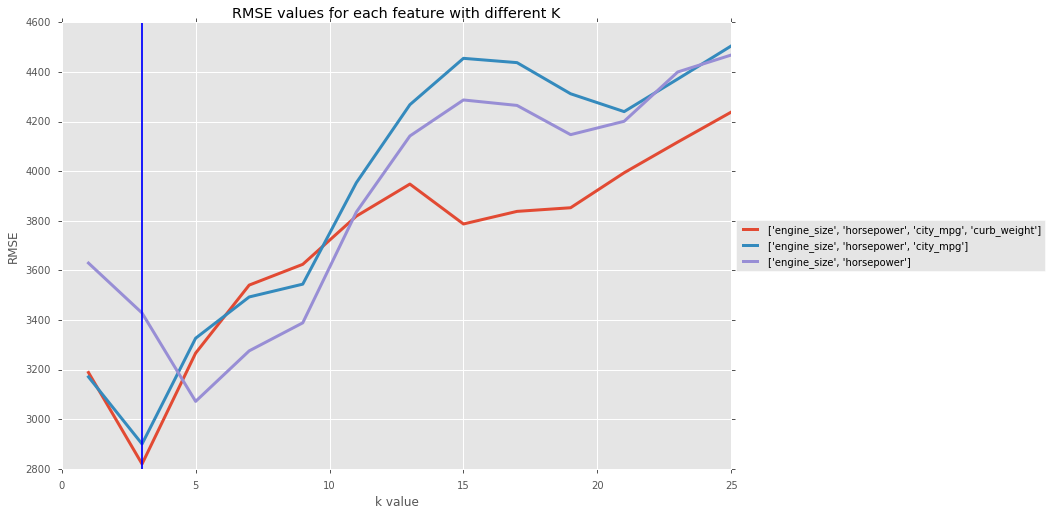

In [138]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
for k,v in total.items():
    x = []
    y = []
    for i in range(1, 27, 2):
        x.append(i)
        y.append(v[i])  
    plt.plot(x,y, label=k, lw=3)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.title("RMSE values for each feature with different K")
plt.axvline(x=3)
plt.show()

As we can observe from the above graph, changing the K value for top 3 models vastly improves their accuracy. Overall, the model with 4 top features have the lowest RMSE (\~2800) at K=3. Meanwhile the model with two features reach its lowest RMSE (~3400) at K=5. After that, increasing the K value result in greater RMSE across all models. 